In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("MS_Dhoni_ODI_record.csv")

In [3]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


- The `str` accessor allows you to perform vectorized string operations on each element of the Series. When you use `str.replace(...)`, it specifically targets string operations, allowing you to replace substrings within each string in the Series.

In [5]:
df['opposition']=df['opposition'].str.replace('v ','',regex=False)
# df['opposition']=df['opposition'].str.replace('v ','')
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [6]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df['year']=df['date'].dt.year.astype(int)
print(df.year) #(df['year'])

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32


- will convert all the values in the 'score' column of the DataFrame df to strings. 

In [7]:
df['score']=df['score'].apply(str)
df['not_out']=np.where(df['score'].str.endswith('*'),1,0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [8]:
df.drop(columns='odi_number',inplace=True)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [9]:
df_new=df.loc[((df['score']!='DNB')&(df['score']!='TDNB')),'runs_scored':]
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [10]:
df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)


In [11]:
#career stats
first_match_date=df['date'].dt.date.min().strftime('%B %d %Y') #first match
print('First match: ', first_match_date)
last_match_date=df['date'].dt.date.max().strftime('%B %d %Y') #last match
print('Last match: ', last_match_date)
number_of_matches=df.shape[0] #number of matches played
print('Number of matches:',number_of_matches)

First match:  December 23 2004
Last match:  July 09 2019
Number of matches: 350


In [12]:
number_of_inns=df_new.shape[0] #number of innings
print('Number of innings:',number_of_inns)
not_outs=df_new['not_out'].sum() #numberof not outs in career
print('Not outs: ',not_outs)
runs_scored=df_new['runs_scored'].sum() #runs scored in career
print('Runs scored in career: ',runs_scored)

Number of innings: 297
Not outs:  84
Runs scored in career:  10773


In [13]:
balls_faced=df_new['balls_faced'].sum()
number_of_inss_not_outs=df_new['not_out'].sum()

In [14]:
career_sr=(runs_scored/balls_faced)*100 #career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg=(runs_scored/(number_of_inss_not_outs)) #career average
print(f'Career strike rate: {number_of_inss_not_outs:.2f}')

Career strike rate: 87.56
Career strike rate: 84.00


In [15]:
hundreds=(df_new['runs_scored']>=100).sum()
print('Number of 100s:',hundreds)
fifties=((df_new['runs_scored']>=50) &(df_new['runs_scored']<100)).sum()
print('Number of 50s:',fifties)
fours=df_new['fours'].sum()
print('Number of 4s: ', fours)
sixes=df_new['sixes'].sum()
print('Number of 6s',sixes)

Number of 100s: 10
Number of 50s: 73
Number of 4s:  826
Number of 6s 229


In [16]:
#Count the coccurences of each unique value in the opposition column
#opposition_counts will be a series with a labelled index as opposition
opposition_counts=df['opposition'].value_counts()
print(opposition_counts)

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


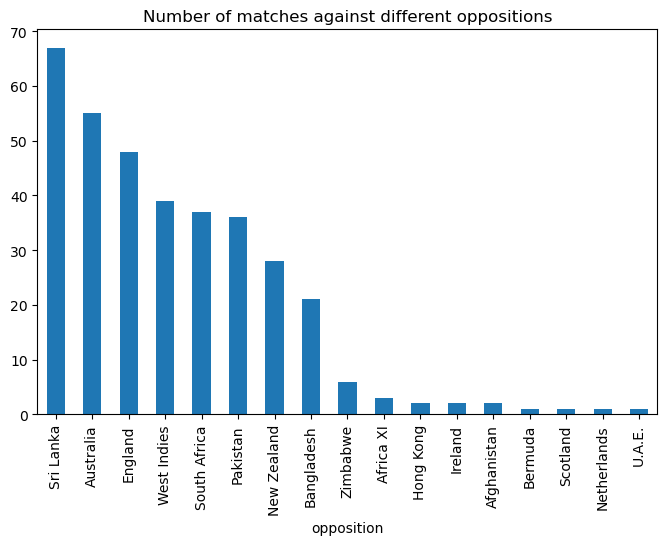

In [17]:
#Plot as bar graph
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8,5))
plt.show()

In [18]:
#Run scored against each team
#Group the DataFrame by 'opposition' column
grouped_by_opposition=df_new.groupby('opposition')
#Sum the 'runs_scored' column for each group
sum_of_runs_scored=grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


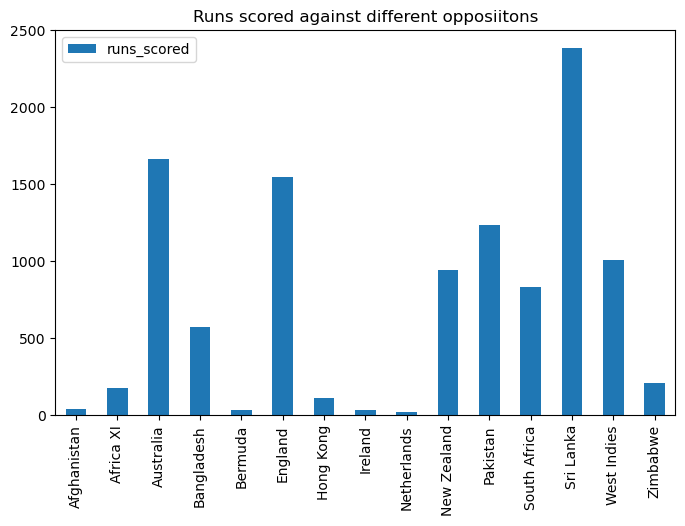

In [19]:
runs_scored_by_opposition=pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition',kind='bar',title='Runs scored against different opposiitons', figsize=(8,5))
plt.xlabel(None);
plt.show()

#### Plots

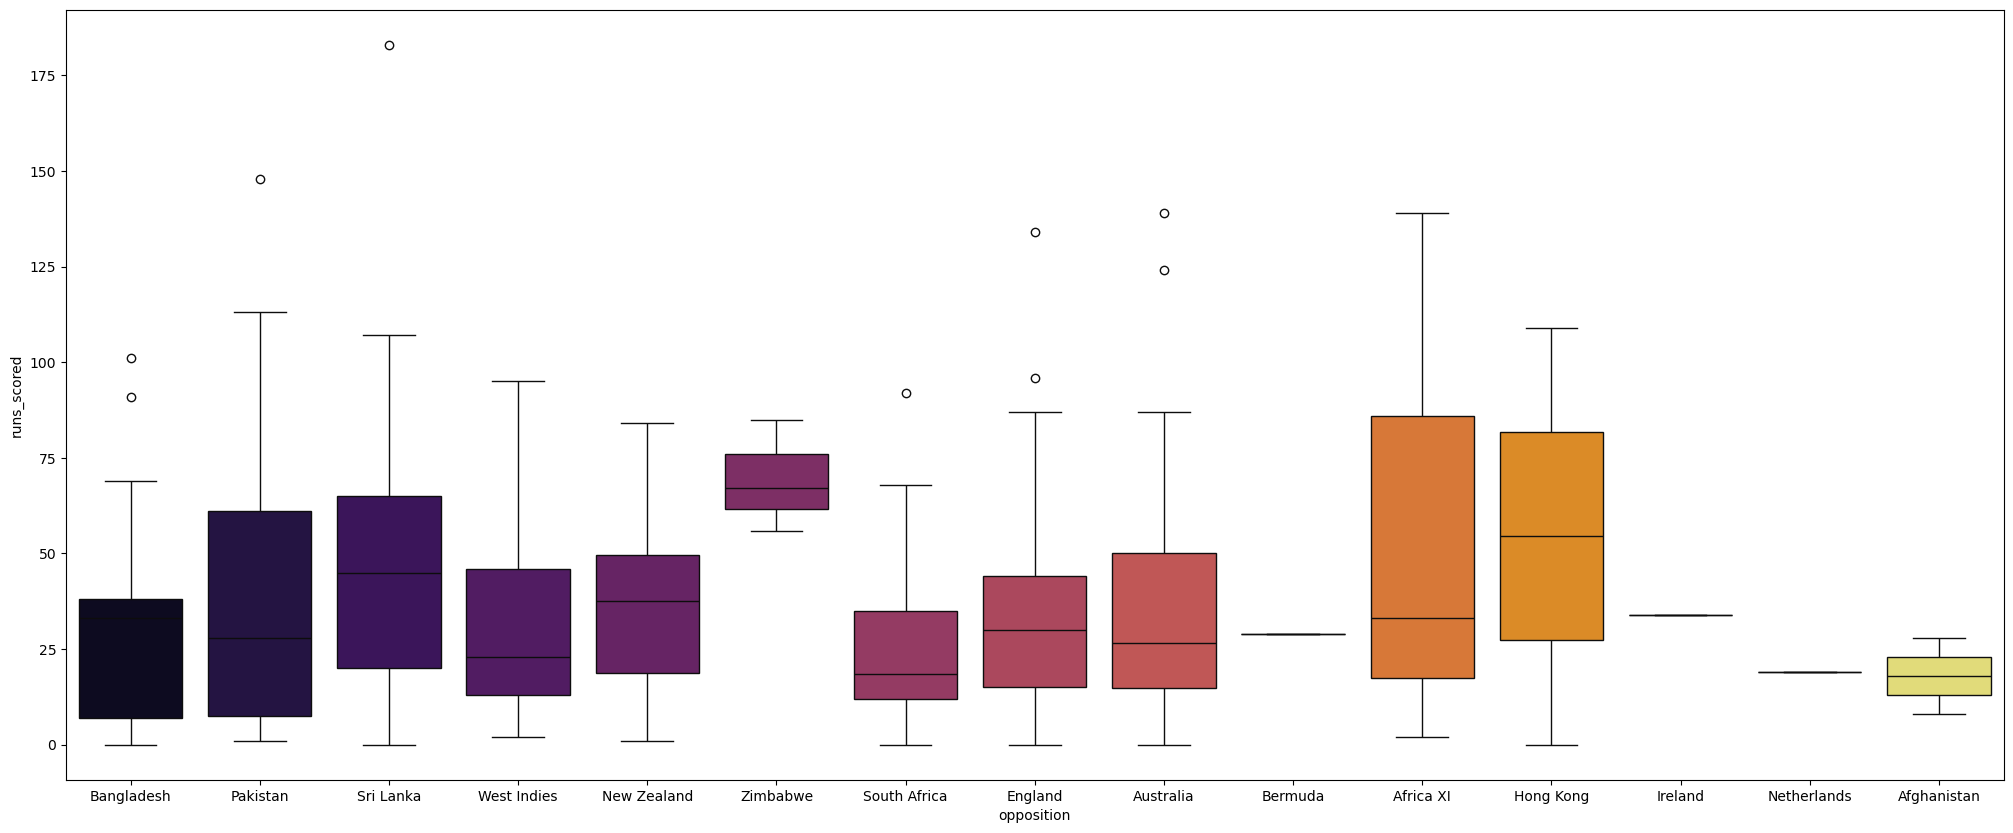

In [21]:
plt.figure(figsize=(25,10))
sns.boxplot(x='opposition', y='runs_scored', data=df_new, hue = "opposition", palette = 'inferno')
plt.show()

In [22]:
# list of oppositions to filter
opposition_list=['England', 'Australia','West Indies','South Africa','New Zealand', 'Pakistan','Sri Lanka','Bangladesh']

In [23]:
#Filter rows where 'opposition' is in the list
df_filtered=df_new[df_new['opposition'].isin(opposition_list)]

In [24]:
#Sort the filtered DataFrame in descending order of 'runs_scored'
df_filtered=df_filtered.sort_values(by='runs_scored',ascending=False)

In [25]:
#Display the filtered DataFrame
print(df_filtered)

     runs_scored  balls_faced  strike_rate  fours  sixes    opposition  \
21           183          145       126.20     15     10     Sri Lanka   
4            148          123       120.32     15      4      Pakistan   
228          139          121       114.87     12      5     Australia   
284          134          122       109.83     10      6       England   
146          124          107       115.88      9      3     Australia   
..           ...          ...          ...    ...    ...           ...   
74             0            4         0.00      0      0  South Africa   
273            0            3         0.00      0      0     Australia   
171            0            1         0.00      0      0     Australia   
223            0            4         0.00      0      0       England   
0              0            1         0.00      0      0    Bangladesh   

            ground       date  year  not_out  
21          Jaipur 2005-10-31  2005        1  
4    Visakhapatna

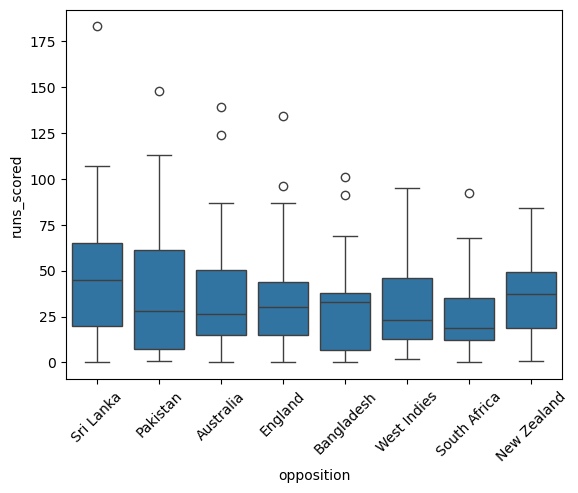

In [26]:
#Redraw boxplot but on filtered opposition list
sns.boxplot(x='opposition',y='runs_scored',data=df_filtered)
plt.xticks(rotation=45)
plt.show()

### histogram (displot) with and without kde (Kernel Density Estimation)

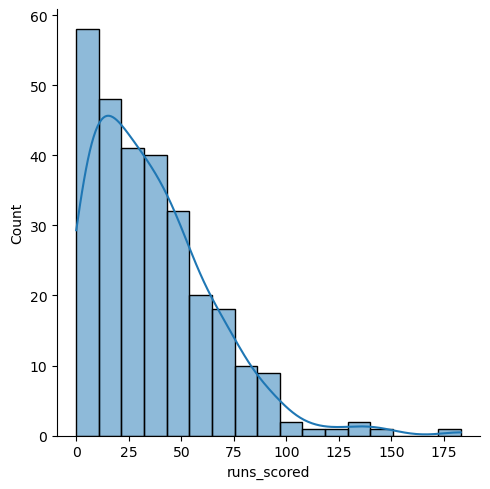

In [28]:
### histogram (displot) with and without kde (Kernel Density Estimation)
sns.displot(data=df_filtered, x='runs_scored',kde=True)
plt.show()

### histogrm with bins

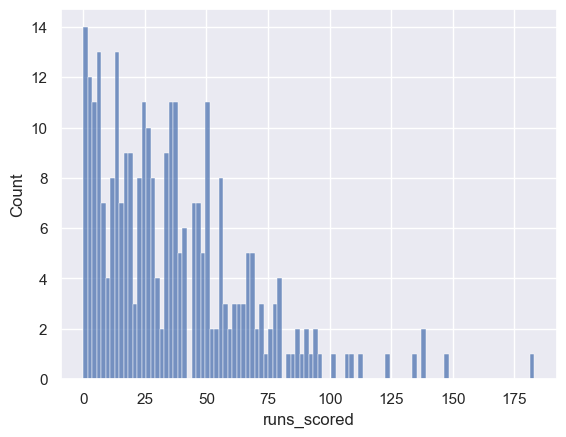

In [30]:
### histogrm with bibs
sns.set(style='darkgrid')
sns.histplot(data=df_new,x='runs_scored',bins=100)
plt.show()

### KDE plot


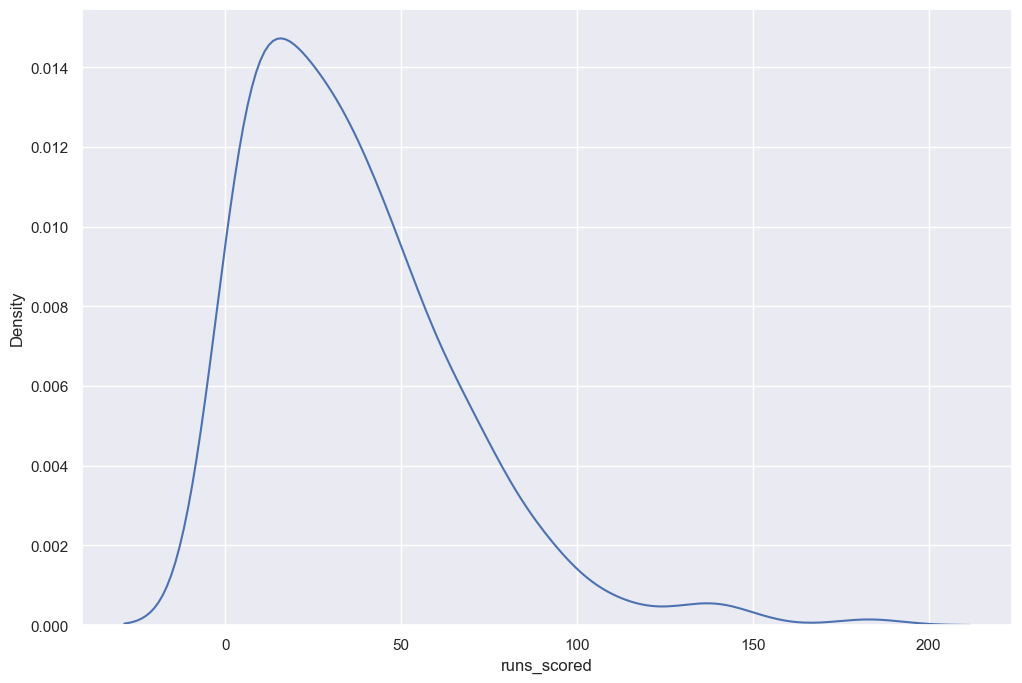

In [32]:
### KDE plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored')
plt.show()

#### KDE plot with cumulative probability

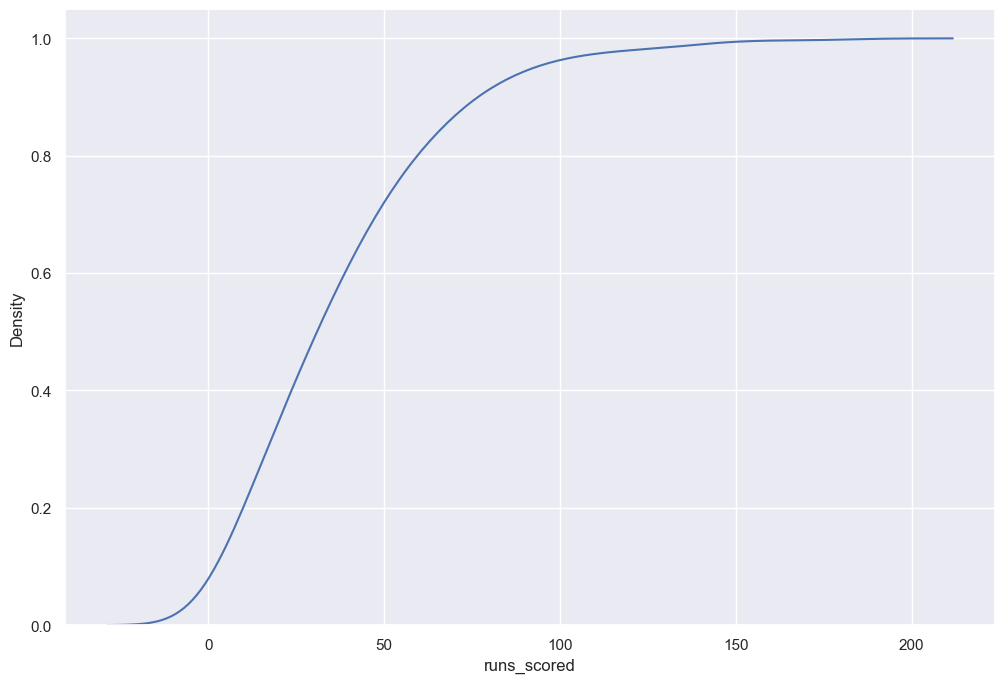

In [34]:
#### KDE plot with cumulative probability
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored',cumulative=True)
plt.show()

#### Jointplot

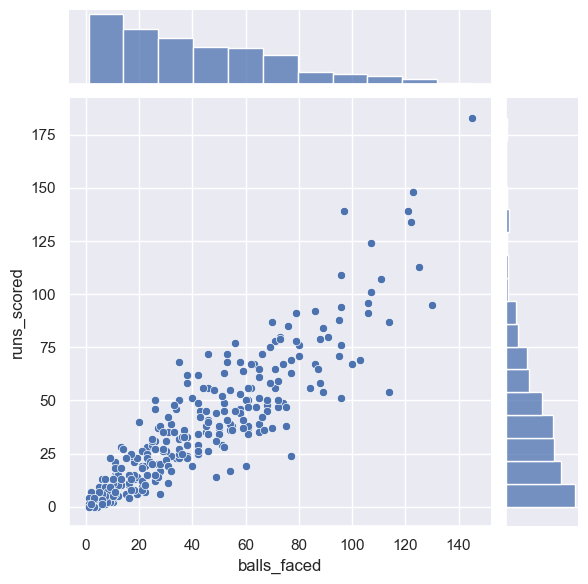

In [36]:
sns.jointplot(x='balls_faced',y='runs_scored',data=df_new,kind='scatter')
plt.show()

#### Heat Map
- annot - annotation(numbers displayed over the map)
- square=False:
When square=False (the default), the cells in the heatmap are rectangular. The dimensions of each cell are determined by the data's aspect ratio and the figure size.
This allows the heatmap to adjust itself based on the number of rows and columns, so that it fits the figure's size while maintaining proportional cell sizes.
square=True:
When square=True, the cells are drawn as perfect squares. This makes the plot look more uniform, regardless of how many rows and columns there are.

In [38]:
correlation_matrix=df_new[['balls_faced','runs_scored']].corr()

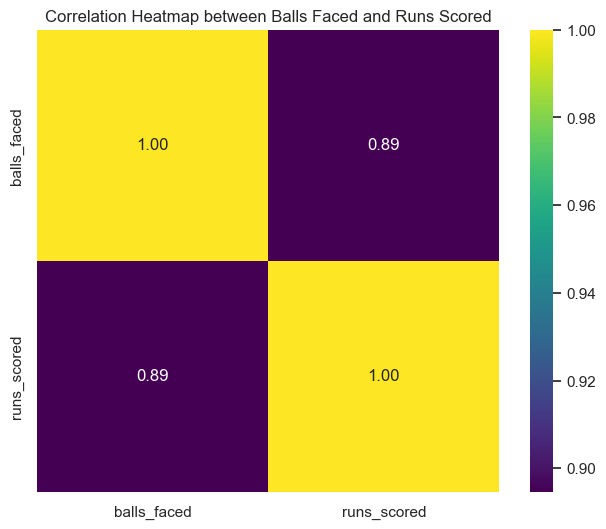

In [39]:
#Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis', square=True,fmt=".2f")
plt.title('Correlation Heatmap between Balls Faced and Runs Scored')
plt.show()

In [40]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [41]:
balls = df_new.groupby('opposition')[['balls_faced', 'runs_scored']].sum()

In [42]:
# balls = df_new.groupby('opposition')['balls_faced', 'runs_scored'].sum().reset_index()
# runs = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
# balls["run_scored"] = runs["runs_scored"]
balls["strike_rate"] =(balls["runs_scored"] /balls["balls_faced"])*100
# balls = balls.drop(["opposition"], axis = 1)
# balls["run_scored"] = runs["runs_scored"]

In [43]:
balls.head()

,balls_faced,runs_scored,strike_rate
opposition,,,
Afghanistan,69,36,52.173913
Africa XI,139,174,125.179856
Australia,2052,1660,80.896686
Bangladesh,682,569,83.431085
Bermuda,25,29,116.000000


<Axes: ylabel='opposition'>

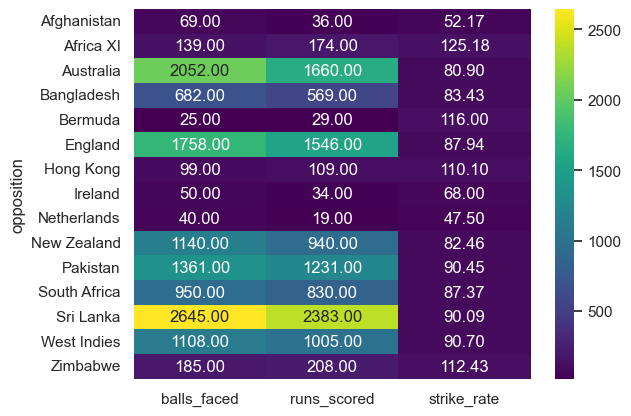

In [44]:
#Create the heatmap
# plt.figure(figsize=(8,6))
sns.heatmap(data=balls, annot=True, cmap='viridis',fmt=".2f")
# plt.title('Correlation Heatmap between Balls Faced and Runs Scored')
# plt.show()

In [45]:
g = df_new.groupby('opposition')
agg_sum = g.agg({'balls_faced':'sum', 'runs_scored':'sum'})

In [46]:
agg_sum['strike_rate'] = (agg_sum['runs_scored'] / agg_sum['balls_faced'])*100

<Axes: ylabel='opposition'>

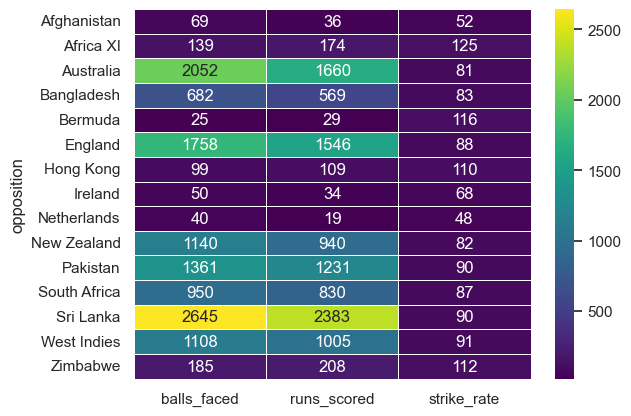

In [47]:
sns.heatmap(agg_sum, linewidth = 0.5, annot = True, fmt = '.0f', cmap = 'viridis')

In [48]:
# creating a stacked bar plot
d = df_filtered[[]]

In [49]:
x = df_filtered.groupby('opposition')[['sixes', 'fours','runs_scored']].sum()

In [50]:
x

,sixes,fours,runs_scored
opposition,,,
Australia,33,112,1660
Bangladesh,3,49,569
England,34,129,1546
New Zealand,20,73,940
Pakistan,25,108,1231
South Africa,18,67,830
Sri Lanka,45,182,2383
West Indies,28,63,1005


In [51]:
x['boundries'] = (x['sixes']*6) + (x['fours']*4)

In [52]:
x = x.reset_index()

<BarContainer object of 8 artists>

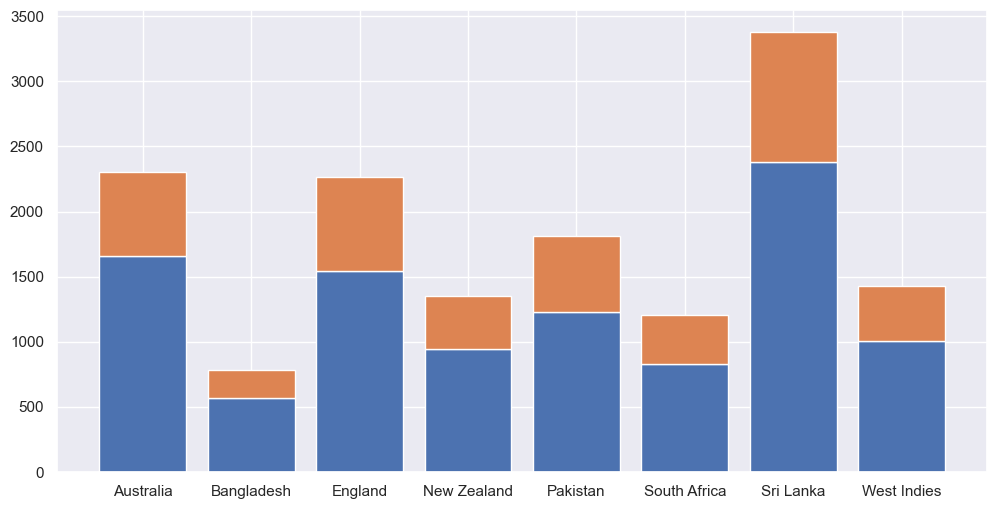

In [53]:
plt.figure(figsize=(12,6))
plt.bar(x['opposition'], x['runs_scored'], label = 'Runs scored')
plt.bar(x['opposition'], x['boundries'], bottom = x['runs_scored'], label = 'boundries')